In [ ]:
!apt install tesseract-ocr


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 28 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 0s (11.0 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 122532 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-eng_1%3a

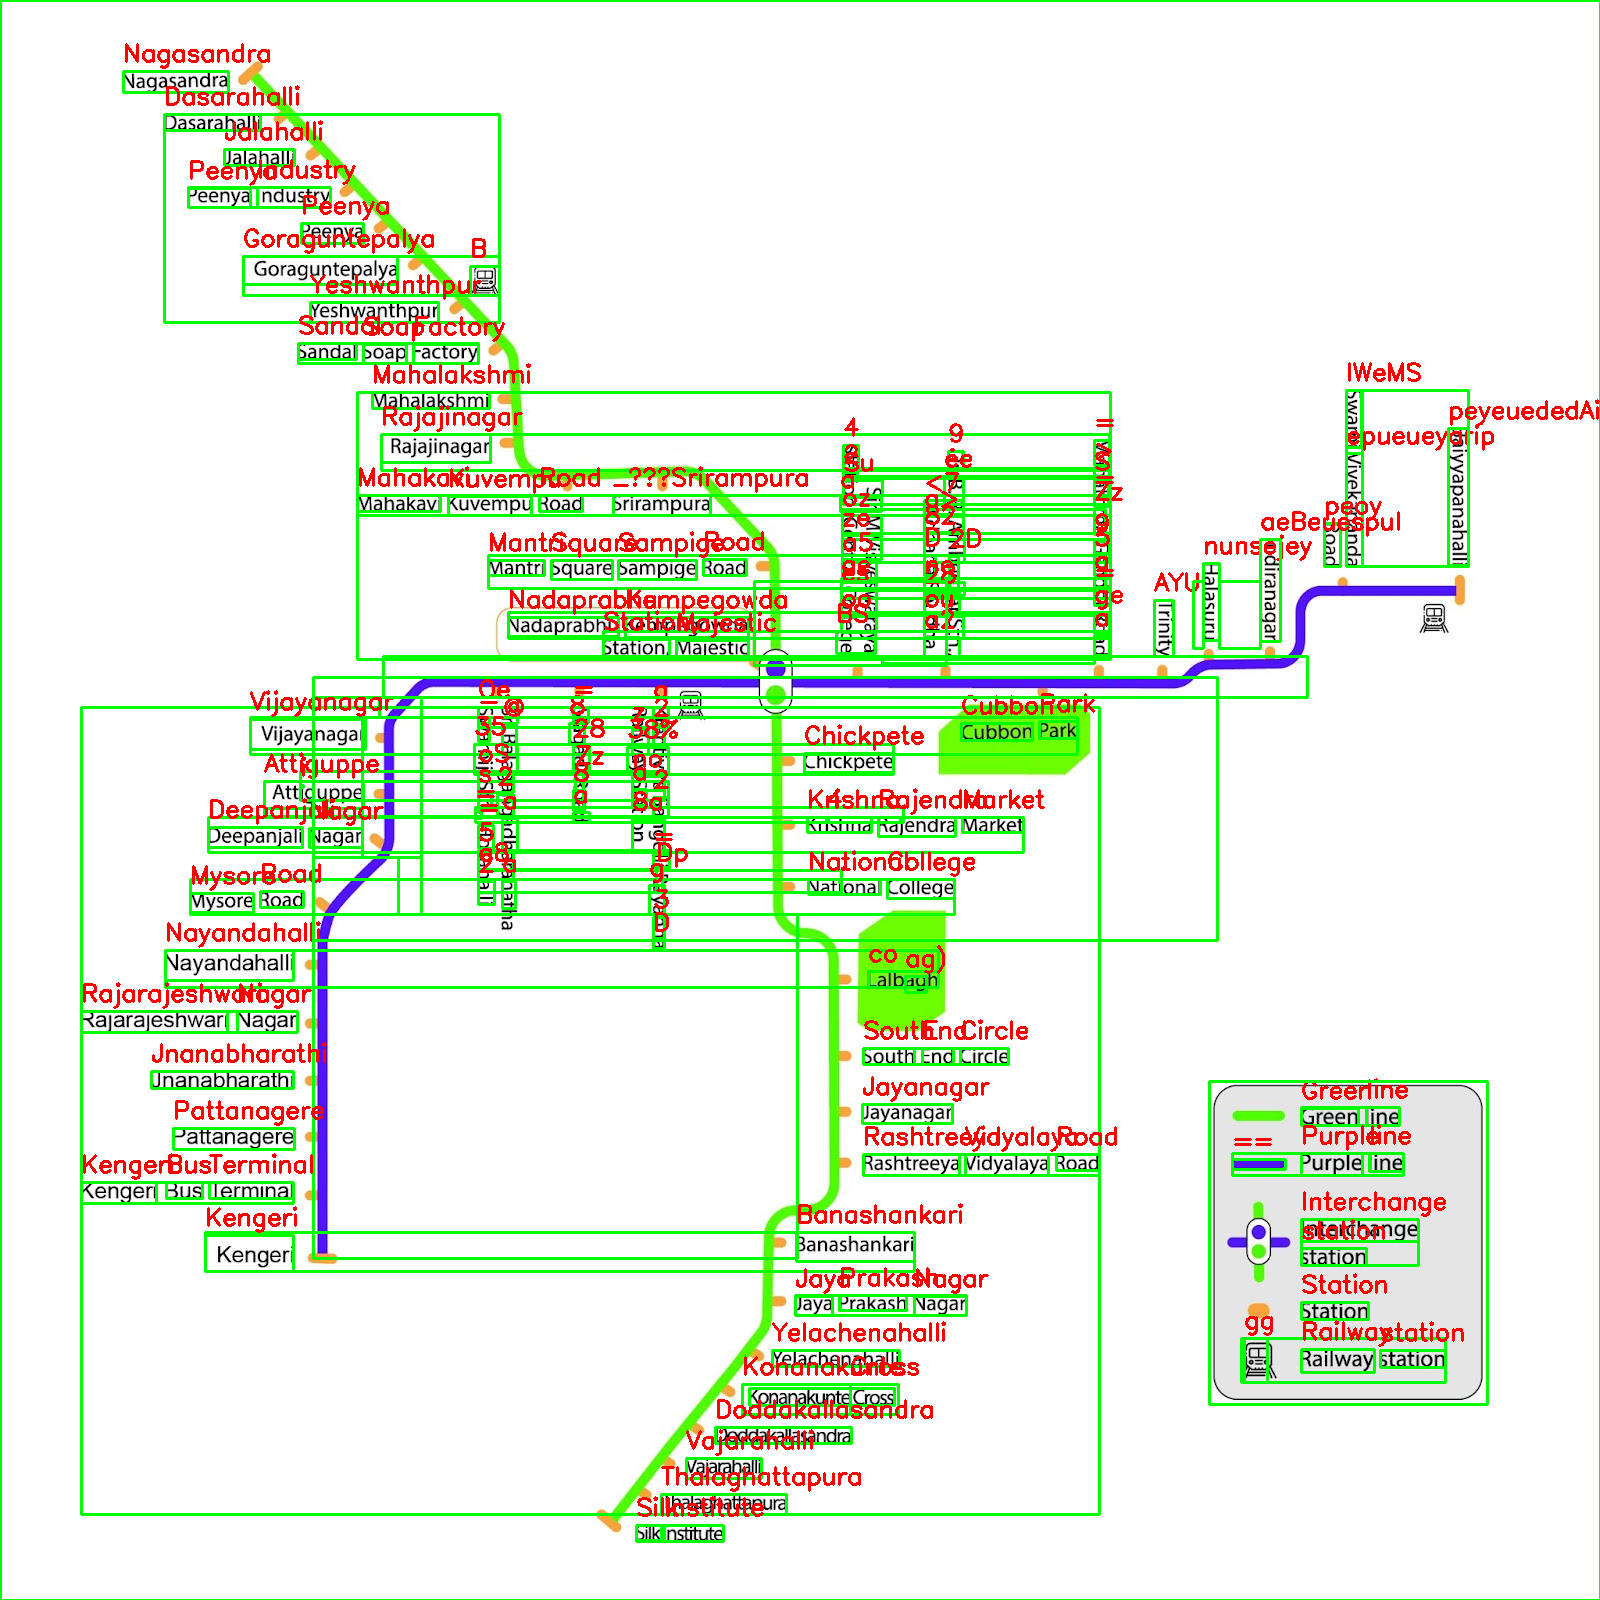

In [ ]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow

def execute_part3(image_path):

    #Load the image using OpenCV
    image = cv2.imread(image_path)

    #Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #Perform text detection using PyTesseract
    data = pytesseract.image_to_data(gray, output_type=pytesseract.Output.DICT, lang='eng+multiple')

    #Extract the detected words and their corresponding bounding boxes
    words = data['text']
    boxes = zip(data['left'], data['top'], data['width'], data['height'])

    #Draw bounding boxes and annotate text on the image
    for word, (left, top, width, height) in zip(words, boxes):
        cv2.rectangle(image, (left, top), (left + width, top + height), (0, 255, 0), 2)
        cv2.putText(image, word, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

    cv2_imshow(image)

image_file_path = '/content/input8.jpeg'
execute_part3(image_file_path)
